# 离散傅立叶变换(DFT，Discrete Fourier Transform)
- https://www.zhihu.com/question/22611929?sort=created

## 1D正变换-DFT
## 
$$
    F(u) = \sum_{x=0}^{X_{size}-1}f(x)e^{-2j\frac{\pi xu}{X_{size}}}
$$

## 1D逆变换-IDFT
## 
$$
    f(x) = \frac{1}{U_{size}} \sum_{u=0}^{U_{size}-1}F(u)e^{2j\frac{\pi xu}{X_{size}}}
$$

- 一般$U_{size} == X_{size}$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def dft(data, nfreq):
    data   = np.array(data)
    ndata  = len(data)

    output = np.zeros(nfreq, dtype=np.complex)
    for ifreq in range(nfreq):
        for idata in range(ndata):
            output[ifreq] += data[idata] * np.exp(-2j * np.pi * ifreq * idata / ndata)
    return output

def idft(dft_data, ndata):
    nfreq = len(dft_data)
    dft_data = np.array(dft_data)
    output = np.zeros(ndata, dtype=np.complex)
    for idata in range(ndata):
        for ifreq in range(nfreq):
            output[idata] += dft_data[ifreq] * np.exp(2j * np.pi * ifreq * idata / ndata)
    return output / nfreq

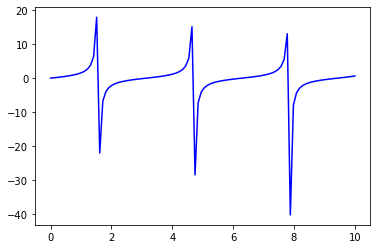

In [3]:
x = np.linspace(0, 10, 100)
y = np.tan(x)
plt.plot(x, y, "b-")

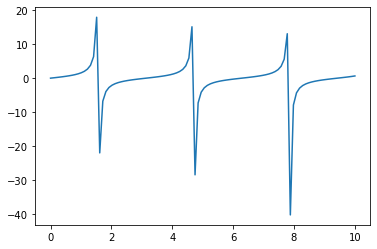

In [17]:
nfreq = len(y)
ndata = len(y)
dft_y = dft(y, nfreq)
res_data = idft(dft_y, len(x))
plt.plot(x, res_data.real)

In [5]:
data = [1, 5, 3, 0.9, 1.2]
dft_data = dft(data, len(data))
idft_data = idft(dft_data, len(data))
idft_data.real

array([1. , 5. , 3. , 0.9, 1.2])